# Project 3: Reddit Post Sorting

- **ExplainLikeImFive (ELI5)** - Explain Like I'm Five is the best forum and archive on the internet for layperson-friendly explanations. Don't Panic!
- **AskScience** - Ask a science question, get a science answer.


---

We will be analyzing a random collection of posts from two subReddits, **ExplainLikeImFive** and **AskScience**, in order to build a model to predict if an individual posts belong to ELI5 or AskScience; we will be analyzing the Title and Body of the Post.

**What am I hoping to achieve with this?**
> If ELI5 is distinguishable from AskScience.

**Why?**
> To see if a subreddit focused on explaining things in a simple manner is that much different than a subreddit that wants to explain it any way they can.

# Exploratory Data Analysis

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords

from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [38]:
ex_df = pd.read_csv('../data/ex_df_final.csv')
print(ex_df.shape)
ex_df.head()

(3776, 9)


,author,created_utc,id,selftext,subreddit,title,comment_ids,comment_amnt,top_comment
0,j_d0tnet,1631248750,ple5nz,Disclaimer: I did see a previous question touc...,explainlikeimfive,"ELI5: Seriously, WTF is up with surface area a...","'hc9xp88', 'hc9xubv', 'hc9y66a', 'hc9ybwi', 'h...",13,The surface area to volume ratio is unit-indep...
1,ImpossibleZero,1631247022,pldqkn,I have a 30 year VA loan at 3.75% and my prope...,explainlikeimfive,ELI5: What does Refinancing a Mortgage Mean an...,"'hc9uc6o', 'hc9umen', 'hc9usj0', 'hc9uxi7', 'h...",6,I just refinanced mine to get a lower interest...
2,Chardington,1631244279,pld1sd,"I’ve been getting into finance, stonks and cry...",explainlikeimfive,ELI5: What exactly is “liquidity”?,"'hc9om2y', 'hc9ortz', 'hc9osmq', 'hc9osnr', 'h...",10,Liquidity is how quickly an asset you possess ...
3,DentonJoe,1631244183,pld0wi,Always wondered why it doesn’t make sense to u...,explainlikeimfive,Eli5 why are diesel/electric powertrains econo...,"'hc9okcf', 'hc9pkte', 'hc9r0vn', 'hc9rl2i', 'h...",17,Diesel electric drivelines in a locomotive are...
4,Aleitei,1631243837,plcxn4,"Having trouble grasping this, I know time and ...",explainlikeimfive,ELI5: Why does time slow down near stronger gr...,"'hc9nq9s', 'hc9omqr', 'hc9thei', 'hc9ti4w', 'h...",17,This is ELI5 so bare with me with a made up ex...


In [39]:
ask_df = pd.read_csv('../data/ask_df_final.csv')
print(ask_df.shape)
ask_df.head()

(3360, 9)


,author,created_utc,id,selftext,subreddit,title,comment_ids,comment_amnt,top_comment
0,ChrisGnam,1630428742,pf9tvb,So most of my peers (26 y/o and older) don't h...,askscience,Are there physiological or psychological diffe...,"'hb2u26q', 'hb2w2r6', 'hb2xjpe', 'hb2zvcg', 'h...",20,Have you ruled out synaesthesia? \n\nhttps://e...
1,MaoGo,1629571284,p8wued,Neutrinos are neutrally charged particles that...,askscience,How do we know that the neutrinos have spin?,"'h9tnotf', 'h9tq6r5', 'h9tuejy', 'h9u1ubp', 'h...",12,Neutrinos were originally proposed as a way to...
2,the_protagonist,1629571059,p8ws1c,How does that “memory” work? \n\nThis comes f...,askscience,If white blood cells are constantly dying and ...,"'h9tuq0p', 'h9tuuqg', 'h9u10c7', 'h9umpe1', 'h...",12,When a T- or B-cell is activated by it's assoc...
3,CyKii,1629567841,p8vtoe,Obviously it's best to be careful about these ...,askscience,"If mRNA vaccines remain proven safe, is it act...","'h9tem11', 'h9tfbjt', 'h9tfk2j', 'h9tfspy', 'h...",292,"For a completely new virus, sure - you'd defin..."
4,Comprehensive_Lead41,1629564364,p8ushd,Why does it look like this? https://images.app...,askscience,Why is the floor of the Uyuni salt desert part...,"'h9t8m72', 'h9t8rg2', 'h9t9h9s', 'h9t9zht', 'h...",94,[Convective currents in the evaporating surfac...


## Exploratory Data Analysis

**Let's do some NLP exploration on our two datasets.**

We will define 2 functions to perform our analysis for length of the Title, Body, and Top Comment of the posts.

In [40]:
def word_len(df, column):
    '''
    Takes the dataframe and column to be measured and adds a new column to that dataframe.
    '''
    words = []
    for status in df[column]:
        words.append(len(status.split(' ')))

    df[column+'_words'] = words
    
    return df

In [41]:
def char_len(df, column):

    status_length = []
    for status in df[column]:
        status_length.append(len(status))


    df[column+'_len'] = status_length

    return df

---

**How long are the titles on average?**

In [42]:
ex_df = word_len(ex_df, 'title')
ex_df = char_len(ex_df, 'title')
print(f"For the ELI5 SubReddit, Average length of Title is {round(ex_df['title_words'].mean())} words, or {round(ex_df['title_len'].mean())} characters.")

For the ELI5 SubReddit, Average length of Title is 13 words, or 72 characters.


In [43]:
ask_df = word_len(ask_df, 'title')
ask_df = char_len(ask_df, 'title')
print(f"For the AskScience SubReddit, Average length of Title is {round(ask_df['title_words'].mean())} words, or {round(ask_df['title_len'].mean())} characters.")

For the AskScience SubReddit, Average length of Title is 14 words, or 80 characters.


**How long are the bodies (selftext) of the submission on average?**

In [44]:
ex_df = word_len(ex_df, 'selftext')
ex_df = char_len(ex_df, 'selftext')
print(f"For the ELI5 SubReddit, Average length of Selftext is {round(ex_df['selftext_words'].mean())} words, or {round(ex_df['selftext_len'].mean())} characters.")

For the ELI5 SubReddit, Average length of Selftext is 46 words, or 255 characters.


In [45]:
ask_df = word_len(ask_df, 'selftext')
ask_df = char_len(ask_df, 'selftext')
print(f"For the AskScience SubReddit, Average length of Selftext is {round(ask_df['selftext_words'].mean())} words, or {round(ask_df['selftext_len'].mean())} characters.")

For the AskScience SubReddit, Average length of Selftext is 61 words, or 357 characters.


**How long are the top comments of the submission on average?**

In [46]:
ex_df = word_len(ex_df, 'top_comment')
ex_df = char_len(ex_df, 'top_comment')
print(f"For the ELI5 SubReddit, Average length of the Top Comment is {round(ex_df['top_comment_words'].mean())} words, or {round(ex_df['top_comment_len'].mean())} characters.")

For the ELI5 SubReddit, Average length of the Top Comment is 78 words, or 449 characters.


In [47]:
ask_df = word_len(ask_df, 'top_comment')
ask_df = char_len(ask_df, 'top_comment')
print(f"For the AskScience SubReddit, Average length of the Top Comment is {round(ask_df['top_comment_words'].mean())} words, or {round(ask_df['top_comment_len'].mean())} characters.")

For the AskScience SubReddit, Average length of the Top Comment is 128 words, or 967 characters.


### Before we go further, lets clean up these datsets a bit.

In [48]:
ask_df.drop(columns=['created_utc', 'comment_amnt', 'id', 'author', 'subreddit', 'comment_ids'], inplace=True)
ask_df.head()

,selftext,title,top_comment,title_words,title_len,selftext_words,selftext_len,top_comment_words,top_comment_len
0,So most of my peers (26 y/o and older) don't h...,Are there physiological or psychological diffe...,Have you ruled out synaesthesia? \n\nhttps://e...,15,111,227,1189,65,478
1,Neutrinos are neutrally charged particles that...,How do we know that the neutrinos have spin?,Neutrinos were originally proposed as a way to...,9,44,31,202,221,1318
2,How does that “memory” work? \n\nThis comes f...,If white blood cells are constantly dying and ...,When a T- or B-cell is activated by it's assoc...,19,115,31,187,68,439
3,Obviously it's best to be careful about these ...,"If mRNA vaccines remain proven safe, is it act...","For a completely new virus, sure - you'd defin...",26,150,64,366,78,493
4,Why does it look like this? https://images.app...,Why is the floor of the Uyuni salt desert part...,[Convective currents in the evaporating surfac...,17,102,7,71,275,1687


In [49]:
ex_df.drop(columns=['created_utc', 'comment_amnt', 'id', 'author', 'subreddit', 'comment_ids'], inplace=True)
ex_df.head()

,selftext,title,top_comment,title_words,title_len,selftext_words,selftext_len,top_comment_words,top_comment_len
0,Disclaimer: I did see a previous question touc...,"ELI5: Seriously, WTF is up with surface area a...",The surface area to volume ratio is unit-indep...,16,90,205,1098,140,885
1,I have a 30 year VA loan at 3.75% and my prope...,ELI5: What does Refinancing a Mortgage Mean an...,I just refinanced mine to get a lower interest...,14,84,44,218,61,328
2,"I’ve been getting into finance, stonks and cry...",ELI5: What exactly is “liquidity”?,Liquidity is how quickly an asset you possess ...,5,34,84,500,214,1151
3,Always wondered why it doesn’t make sense to u...,Eli5 why are diesel/electric powertrains econo...,Diesel electric drivelines in a locomotive are...,14,92,26,173,127,733
4,"Having trouble grasping this, I know time and ...",ELI5: Why does time slow down near stronger gr...,This is ELI5 so bare with me with a made up ex...,11,70,16,85,89,507


**Let's see some additional numerical descriptions for these newly created columns.**

In [50]:
ask_df.describe()

,title_words,title_len,selftext_words,selftext_len,top_comment_words,top_comment_len
count,3360.000000,3360.000000,3360.000000,3360.000000,3360.000000,3360.000000
mean,13.871429,80.137500,60.589286,356.525298,128.336310,966.633036
std,7.537471,42.656547,56.742125,347.595018,134.991588,1079.120756
min,2.000000,15.000000,1.000000,1.000000,1.000000,3.000000
25%,9.000000,50.000000,26.000000,147.000000,15.000000,101.000000
50%,12.000000,70.000000,45.000000,261.000000,78.000000,473.500000
75%,17.000000,100.000000,76.000000,445.000000,291.000000,1941.250000
max,60.000000,297.000000,599.000000,3427.000000,1456.000000,8677.000000


In [51]:
ex_df.describe()

,title_words,title_len,selftext_words,selftext_len,top_comment_words,top_comment_len
count,3776.000000,3776.000000,3776.000000,3776.000000,3776.000000,3776.000000
mean,12.868114,71.662341,46.253708,255.451801,77.793432,448.710805
std,7.286717,39.943147,37.126014,208.351451,85.797805,494.723187
min,1.000000,11.000000,1.000000,1.000000,1.000000,7.000000
25%,8.000000,45.000000,22.000000,119.000000,27.000000,154.000000
50%,11.000000,63.000000,37.000000,199.000000,54.000000,309.000000
75%,16.000000,88.000000,60.000000,326.250000,101.000000,582.000000
max,54.000000,299.000000,440.000000,2341.000000,1093.000000,6113.000000


**Nothing too out of line here. We see at least 1 very long selftext, title, and top_comment but nothing too worrisome.**

---

## What is the distribution of title, selftext, and top comment lengths and word counts?

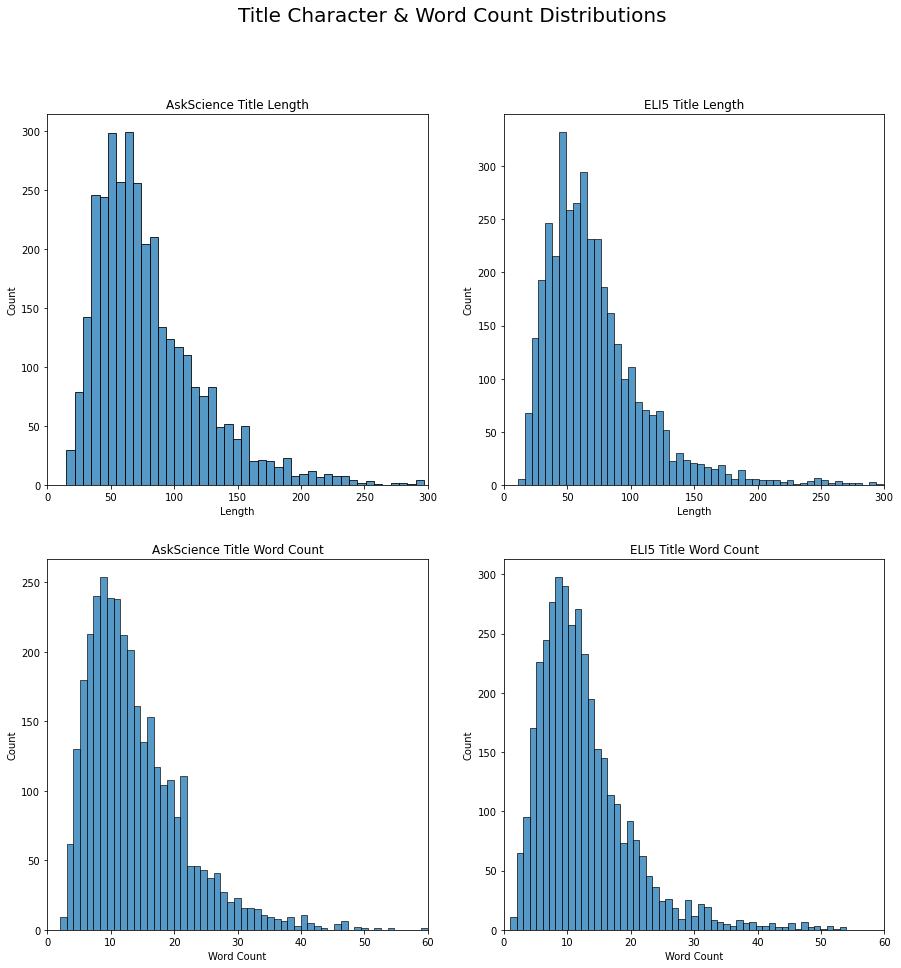

In [52]:
fig, ax = plt.subplots(2, 2, figsize=(15,15))
sns.histplot(ask_df['title_len'], ax=ax[0,0])
sns.histplot(ex_df['title_len'], ax=ax[0,1])
sns.histplot(ask_df['title_words'], ax=ax[1,0])
sns.histplot(ex_df['title_words'], ax=ax[1,1])

ax[0,0].set(xlabel='Length', xlim=[0,300], title='AskScience Title Length')
ax[0,1].set(xlabel='Length', xlim=[0,300], title='ELI5 Title Length')
ax[1,0].set(xlabel='Word Count', xlim=[0,60], title='AskScience Title Word Count')
ax[1,1].set(xlabel='Word Count', xlim=[0,60], title='ELI5 Title Word Count')

fig.suptitle('Title Character & Word Count Distributions', fontsize=20);

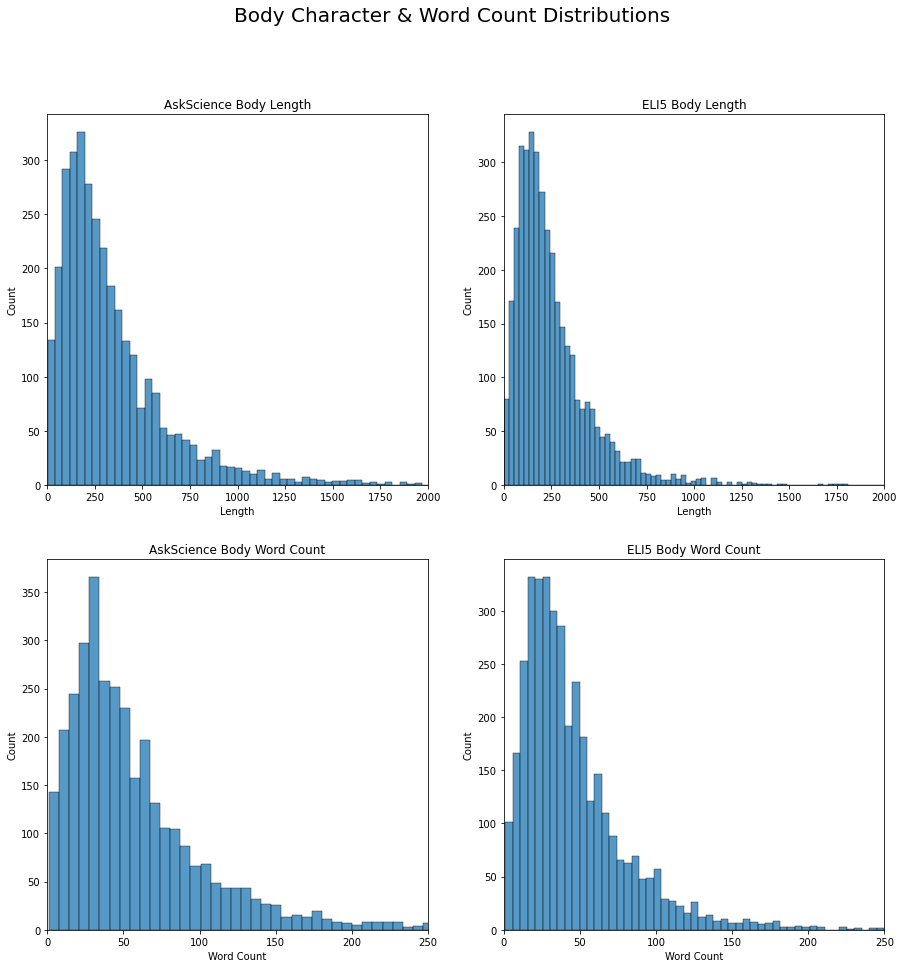

In [53]:
fig, ax = plt.subplots(2, 2, figsize=(15,15))
sns.histplot(ask_df['selftext_len'], ax=ax[0,0])
sns.histplot(ex_df['selftext_len'], ax=ax[0,1])
sns.histplot(ask_df['selftext_words'], ax=ax[1,0])
sns.histplot(ex_df['selftext_words'], ax=ax[1,1])

ax[0,0].set(xlabel='Length', xlim=[0,2000], title='AskScience Body Length')
ax[0,1].set(xlabel='Length', xlim=[0,2000], title='ELI5 Body Length')
ax[1,0].set(xlabel='Word Count', xlim=[0,250], title='AskScience Body Word Count')
ax[1,1].set(xlabel='Word Count', xlim=[0,250], title='ELI5 Body Word Count')

fig.suptitle('Body Character & Word Count Distributions', fontsize=20);

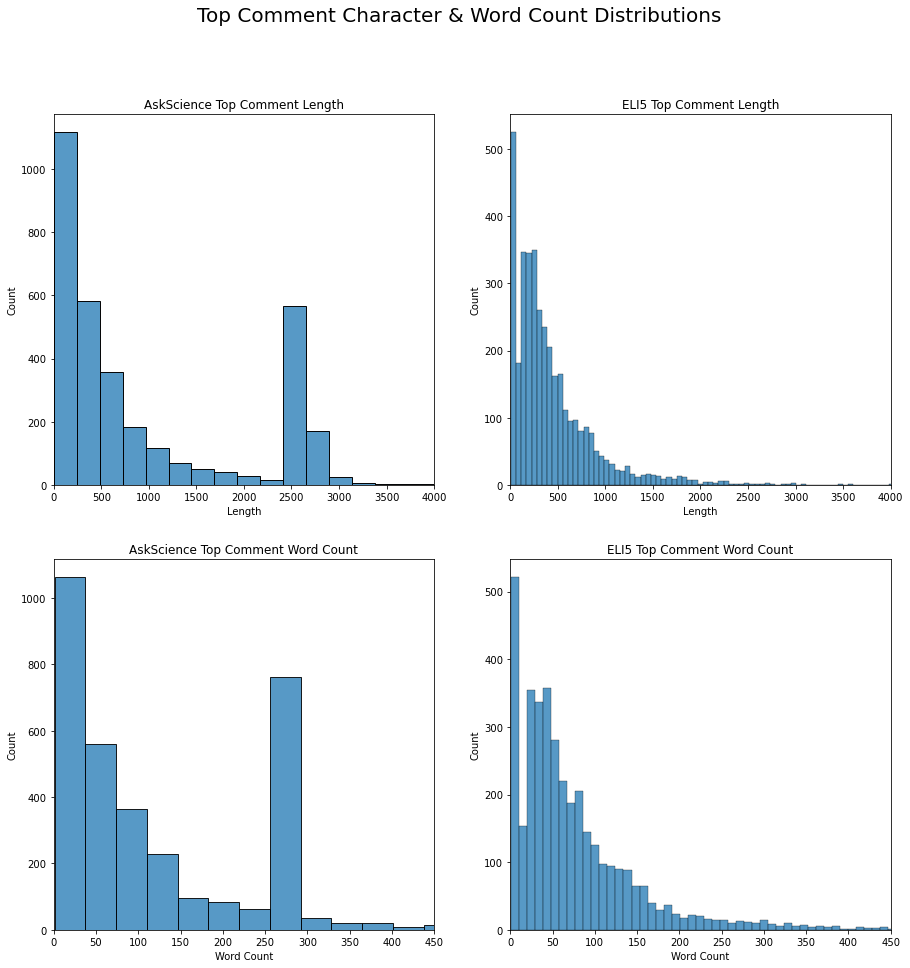

In [54]:
fig, ax = plt.subplots(2, 2, figsize=(15,15))
sns.histplot(ask_df['top_comment_len'], ax=ax[0,0])
sns.histplot(ex_df['top_comment_len'], ax=ax[0,1])
sns.histplot(ask_df['top_comment_words'], ax=ax[1,0])
sns.histplot(ex_df['top_comment_words'], ax=ax[1,1])

ax[0,0].set(xlabel='Length', xlim=[0,4000], title='AskScience Top Comment Length')
ax[0,1].set(xlabel='Length', xlim=[0,4000], title='ELI5 Top Comment Length')
ax[1,0].set(xlabel='Word Count', xlim=[0,450], title='AskScience Top Comment Word Count')
ax[1,1].set(xlabel='Word Count', xlim=[0,450], title='ELI5 Top Comment Word Count')

fig.suptitle('Top Comment Character & Word Count Distributions', fontsize=20);

---

### For our analysis, we would benefit from having title, selftext, and top comment in the same field for our model to analyze. The combined distribution will also be interesting.

In [55]:
ask_df['combo'] = ask_df['title'] + ' ' + ask_df['selftext'] + ' ' + ask_df['top_comment']
ask_df.head()

,selftext,title,top_comment,title_words,title_len,selftext_words,selftext_len,top_comment_words,top_comment_len,combo
0,So most of my peers (26 y/o and older) don't h...,Are there physiological or psychological diffe...,Have you ruled out synaesthesia? \n\nhttps://e...,15,111,227,1189,65,478,Are there physiological or psychological diffe...
1,Neutrinos are neutrally charged particles that...,How do we know that the neutrinos have spin?,Neutrinos were originally proposed as a way to...,9,44,31,202,221,1318,How do we know that the neutrinos have spin? N...
2,How does that “memory” work? \n\nThis comes f...,If white blood cells are constantly dying and ...,When a T- or B-cell is activated by it's assoc...,19,115,31,187,68,439,If white blood cells are constantly dying and ...
3,Obviously it's best to be careful about these ...,"If mRNA vaccines remain proven safe, is it act...","For a completely new virus, sure - you'd defin...",26,150,64,366,78,493,"If mRNA vaccines remain proven safe, is it act..."
4,Why does it look like this? https://images.app...,Why is the floor of the Uyuni salt desert part...,[Convective currents in the evaporating surfac...,17,102,7,71,275,1687,Why is the floor of the Uyuni salt desert part...


In [23]:
ask_df['combo'][4]

'Why is the floor of the Uyuni salt desert partitioned into specifically hexagons and no other pattern? Why does it look like this? https://images.app.goo.gl/8HscWWGJApbzKyGp7'

In [56]:
ex_df['combo'] = ex_df['title'] + ' ' + ex_df['selftext'] + ' ' + ex_df['top_comment']
ex_df.head()

,selftext,title,top_comment,title_words,title_len,selftext_words,selftext_len,top_comment_words,top_comment_len,combo
0,Disclaimer: I did see a previous question touc...,"ELI5: Seriously, WTF is up with surface area a...",The surface area to volume ratio is unit-indep...,16,90,205,1098,140,885,"ELI5: Seriously, WTF is up with surface area a..."
1,I have a 30 year VA loan at 3.75% and my prope...,ELI5: What does Refinancing a Mortgage Mean an...,I just refinanced mine to get a lower interest...,14,84,44,218,61,328,ELI5: What does Refinancing a Mortgage Mean an...
2,"I’ve been getting into finance, stonks and cry...",ELI5: What exactly is “liquidity”?,Liquidity is how quickly an asset you possess ...,5,34,84,500,214,1151,ELI5: What exactly is “liquidity”? I’ve been g...
3,Always wondered why it doesn’t make sense to u...,Eli5 why are diesel/electric powertrains econo...,Diesel electric drivelines in a locomotive are...,14,92,26,173,127,733,Eli5 why are diesel/electric powertrains econo...
4,"Having trouble grasping this, I know time and ...",ELI5: Why does time slow down near stronger gr...,This is ELI5 so bare with me with a made up ex...,11,70,16,85,89,507,ELI5: Why does time slow down near stronger gr...


In [57]:
ex_df['combo'][4]

'ELI5: Why does time slow down near stronger gravity celestial objects? Having trouble grasping this, I know time and space is relative but how does it work? This is ELI5 so bare with me with a made up example…\n\nLet’s think of a gravity well as a funnel. Wide and shallow at the top and long and steep towards the bottom. \n\nLet’s say that time is a horizontal movement and space is the vertical. When you are further away from the center, each movement you can possibly make along the funnel moves you horizontally a certain distance, and vertically a little. As you approach the center “gravity well” your horizontal movement slows and it becomes mostly vertical….'

**We also want to see the word count and character length for this new combo column**

In [58]:
ask_df['combo_len'] = ask_df['title_len'] + ask_df['selftext_len']  + ask_df['top_comment_len']
ask_df['combo_words'] = ask_df['title_words'] + ask_df['selftext_words'] + ask_df['top_comment_words']
ask_df.head()

,selftext,title,top_comment,title_words,title_len,selftext_words,selftext_len,top_comment_words,top_comment_len,combo,combo_len,combo_words
0,So most of my peers (26 y/o and older) don't h...,Are there physiological or psychological diffe...,Have you ruled out synaesthesia? \n\nhttps://e...,15,111,227,1189,65,478,Are there physiological or psychological diffe...,1778,307
1,Neutrinos are neutrally charged particles that...,How do we know that the neutrinos have spin?,Neutrinos were originally proposed as a way to...,9,44,31,202,221,1318,How do we know that the neutrinos have spin? N...,1564,261
2,How does that “memory” work? \n\nThis comes f...,If white blood cells are constantly dying and ...,When a T- or B-cell is activated by it's assoc...,19,115,31,187,68,439,If white blood cells are constantly dying and ...,741,118
3,Obviously it's best to be careful about these ...,"If mRNA vaccines remain proven safe, is it act...","For a completely new virus, sure - you'd defin...",26,150,64,366,78,493,"If mRNA vaccines remain proven safe, is it act...",1009,168
4,Why does it look like this? https://images.app...,Why is the floor of the Uyuni salt desert part...,[Convective currents in the evaporating surfac...,17,102,7,71,275,1687,Why is the floor of the Uyuni salt desert part...,1860,299


In [59]:
ex_df['combo_len'] = ex_df['title_len'] + ex_df['selftext_len'] + ex_df['top_comment_len']
ex_df['combo_words'] = ex_df['title_words'] + ex_df['selftext_words'] + ex_df['top_comment_words']
ex_df.head()

,selftext,title,top_comment,title_words,title_len,selftext_words,selftext_len,top_comment_words,top_comment_len,combo,combo_len,combo_words
0,Disclaimer: I did see a previous question touc...,"ELI5: Seriously, WTF is up with surface area a...",The surface area to volume ratio is unit-indep...,16,90,205,1098,140,885,"ELI5: Seriously, WTF is up with surface area a...",2073,361
1,I have a 30 year VA loan at 3.75% and my prope...,ELI5: What does Refinancing a Mortgage Mean an...,I just refinanced mine to get a lower interest...,14,84,44,218,61,328,ELI5: What does Refinancing a Mortgage Mean an...,630,119
2,"I’ve been getting into finance, stonks and cry...",ELI5: What exactly is “liquidity”?,Liquidity is how quickly an asset you possess ...,5,34,84,500,214,1151,ELI5: What exactly is “liquidity”? I’ve been g...,1685,303
3,Always wondered why it doesn’t make sense to u...,Eli5 why are diesel/electric powertrains econo...,Diesel electric drivelines in a locomotive are...,14,92,26,173,127,733,Eli5 why are diesel/electric powertrains econo...,998,167
4,"Having trouble grasping this, I know time and ...",ELI5: Why does time slow down near stronger gr...,This is ELI5 so bare with me with a made up ex...,11,70,16,85,89,507,ELI5: Why does time slow down near stronger gr...,662,116


**Let's look at this new columns distribution**

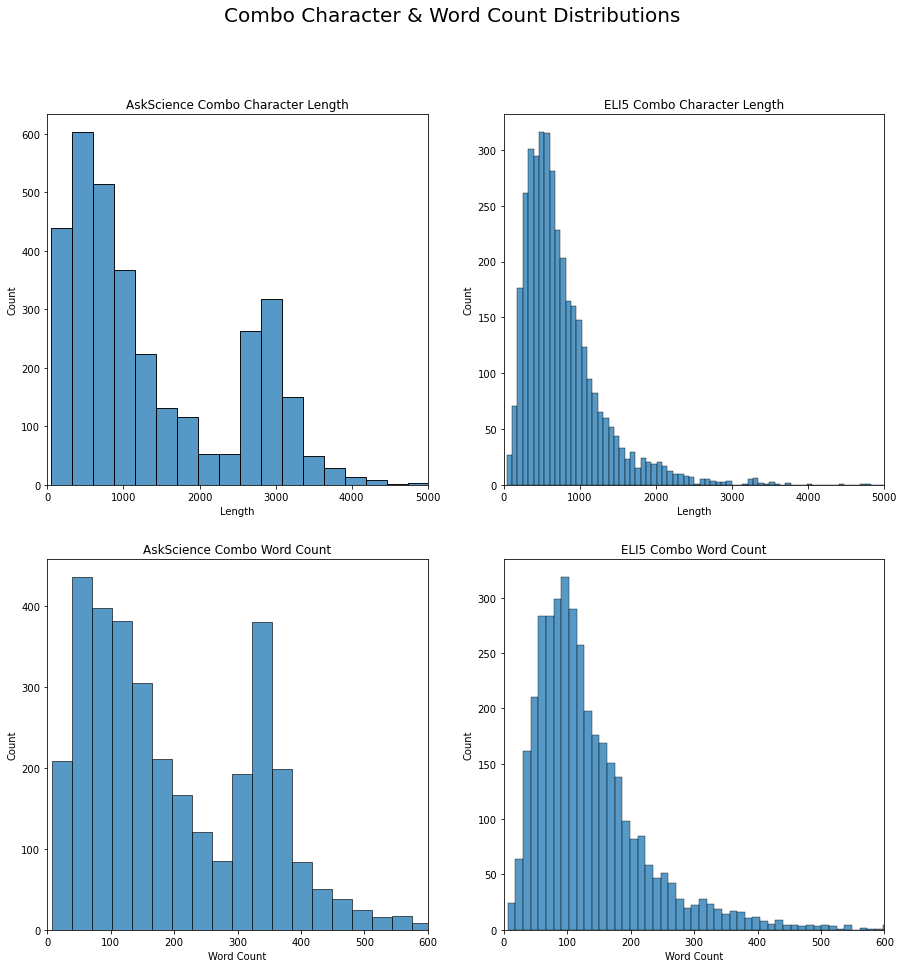

In [62]:
fig, ax = plt.subplots(2, 2, figsize=(15,15))
sns.histplot(ask_df['combo_len'], ax=ax[0,0])
sns.histplot(ex_df['combo_len'], ax=ax[0,1])
sns.histplot(ask_df['combo_words'], ax=ax[1,0])
sns.histplot(ex_df['combo_words'], ax=ax[1,1])

ax[0,0].set(xlabel='Length', xlim=[0,5000], title='AskScience Combo Character Length')
ax[0,1].set(xlabel='Length', xlim=[0,5000], title='ELI5 Combo Character Length')
ax[1,0].set(xlabel='Word Count', xlim=[0,600], title='AskScience Combo Word Count')
ax[1,1].set(xlabel='Word Count', xlim=[0,600], title='ELI5 Combo Word Count')

fig.suptitle('Combo Character & Word Count Distributions', fontsize=20);

In [63]:
ask_df.describe()

,title_words,title_len,selftext_words,selftext_len,top_comment_words,top_comment_len,combo_len,combo_words
count,3360.000000,3360.000000,3360.000000,3360.000000,3360.000000,3360.000000,3360.000000,3360.000000
mean,13.871429,80.137500,60.589286,356.525298,128.336310,966.633036,1403.295833,202.797024
std,7.537471,42.656547,56.742125,347.595018,134.991588,1079.120756,1142.332427,149.785594
min,2.000000,15.000000,1.000000,1.000000,1.000000,3.000000,47.000000,7.000000
25%,9.000000,50.000000,26.000000,147.000000,15.000000,101.000000,498.000000,85.000000
50%,12.000000,70.000000,45.000000,261.000000,78.000000,473.500000,952.500000,159.000000
75%,17.000000,100.000000,76.000000,445.000000,291.000000,1941.250000,2592.250000,324.000000
max,60.000000,297.000000,599.000000,3427.000000,1456.000000,8677.000000,10533.000000,1807.000000


In [64]:
ex_df.describe()

,title_words,title_len,selftext_words,selftext_len,top_comment_words,top_comment_len,combo_len,combo_words
count,3776.000000,3776.000000,3776.000000,3776.000000,3776.000000,3776.000000,3776.000000,3776.000000
mean,12.868114,71.662341,46.253708,255.451801,77.793432,448.710805,775.824947,136.915254
std,7.286717,39.943147,37.126014,208.351451,85.797805,494.723187,559.918865,97.082867
min,1.000000,11.000000,1.000000,1.000000,1.000000,7.000000,38.000000,6.000000
25%,8.000000,45.000000,22.000000,119.000000,27.000000,154.000000,418.000000,75.000000
50%,11.000000,63.000000,37.000000,199.000000,54.000000,309.000000,631.000000,112.000000
75%,16.000000,88.000000,60.000000,326.250000,101.000000,582.000000,970.000000,169.000000
max,54.000000,299.000000,440.000000,2341.000000,1093.000000,6113.000000,6232.000000,1116.000000


## Let's initialize a Count Vectorizer to further perform some data analysis

In [98]:
#We want to use the standard stopwords
en_stopwords = stopwords.words('english')

#We also want to remove the SubReddit name, otherwise it would be a (nearly) 100% indicator
en_stopwords.append('eli5')
en_stopwords.append('askscience')

#From our analysis we also found some other words that would be beneficial to remove
en_stopwords.append('https')
en_stopwords.append('www')
en_stopwords.append('like')
en_stopwords.append('would')
en_stopwords.append('imgur')
en_stopwords.append('com')
en_stopwords.append('en')
en_stopwords.append('wikipedia')
en_stopwords.append('org')
en_stopwords.append('wiki')
en_stopwords.append('x200b')
en_stopwords.append('amp')
en_stopwords.append('askscience')
en_stopwords.append('post')
en_stopwords.append('questions')
en_stopwords.append('get')
en_stopwords.append('people')
en_stopwords.append('reddit')
en_stopwords.append('flair')
en_stopwords.append('question')
en_stopwords.append('message')
en_stopwords.append('please')
en_stopwords.append('also')
en_stopwords.append('please')
en_stopwords.append('one')
en_stopwords.append('http')
en_stopwords.append('3f')
en_stopwords.append('science')
en_stopwords.append('ask')
en_stopwords.append('2fr')
en_stopwords.append('2faskscience')
en_stopwords.append('moderators')
en_stopwords.append('moderator')
en_stopwords.append('subreddit')
en_stopwords.append('000')
en_stopwords.append('google')
en_stopwords.append('moderator')
en_stopwords.append('index')
en_stopwords.append('wiki_askscience_user_help_page')
en_stopwords.append('faq')
en_stopwords.append('bot')
en_stopwords.append('action')

cvec = CountVectorizer(stop_words=en_stopwords)

ask_vect = cvec.fit_transform(ask_df['combo'])
ask_vect_df = pd.DataFrame(ask_vect.todense(), columns=cvec.get_feature_names())

ex_vect = cvec.fit_transform(ex_df['combo'])
ex_vect_df = pd.DataFrame(ex_vect.todense(), columns=cvec.get_feature_names())

In [99]:
print('AskScience dataset has a shape of: ', ask_vect_df.shape)
print('ELI5 dataset has a shape of: ', ex_vect_df.shape)

AskScience dataset has a shape of:  (3360, 26090)
ELI5 dataset has a shape of:  (3776, 22229)


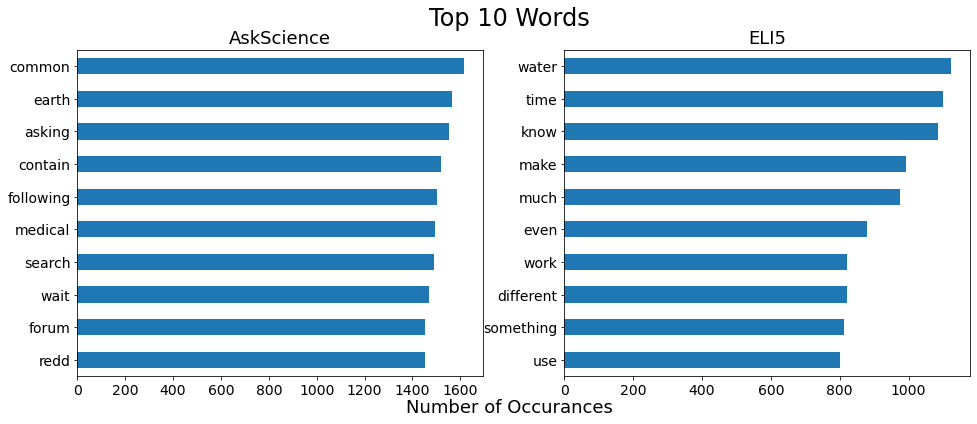

In [100]:
fig, ax = plt.subplots(1,2,figsize=(16,6))
ask_vect_df.sum().sort_values(ascending=False).head(10).plot(kind='barh', ax=ax[0], fontsize=14)
ex_vect_df.sum().sort_values(ascending=False).head(10).plot(kind='barh', ax=ax[1], fontsize=14)

ax[0].set_title('AskScience', fontsize=18)
ax[1].set_title('ELI5', fontsize=18)
ax[0].invert_yaxis()
ax[1].invert_yaxis()

fig.suptitle('Top 10 Words', fontsize=24)
fig.text(0.5,0.04, 'Number of Occurances', ha='center', fontsize=18);

**Interesting. There appears to still be some 'stop words', but they may add value by defining the average author's vocabulary**

---

**How about if we use 2 word phrases via ngram?**

In [101]:
cvec2 = CountVectorizer(stop_words=en_stopwords, ngram_range=(2,2))

ask_vect = cvec2.fit_transform(ask_df['combo'])
ask_vect_df = pd.DataFrame(ask_vect.todense(), columns=cvec2.get_feature_names())

ex_vect = cvec2.fit_transform(ex_df['combo'])
ex_vect_df = pd.DataFrame(ex_vect.todense(), columns=cvec2.get_feature_names())

In [102]:
print('AskScience dataset has a shape of: ', ask_vect_df.shape)
print('ELI5 dataset has a shape of: ', ex_vect_df.shape)

AskScience dataset has a shape of:  (3360, 204007)
ELI5 dataset has a shape of:  (3776, 204973)


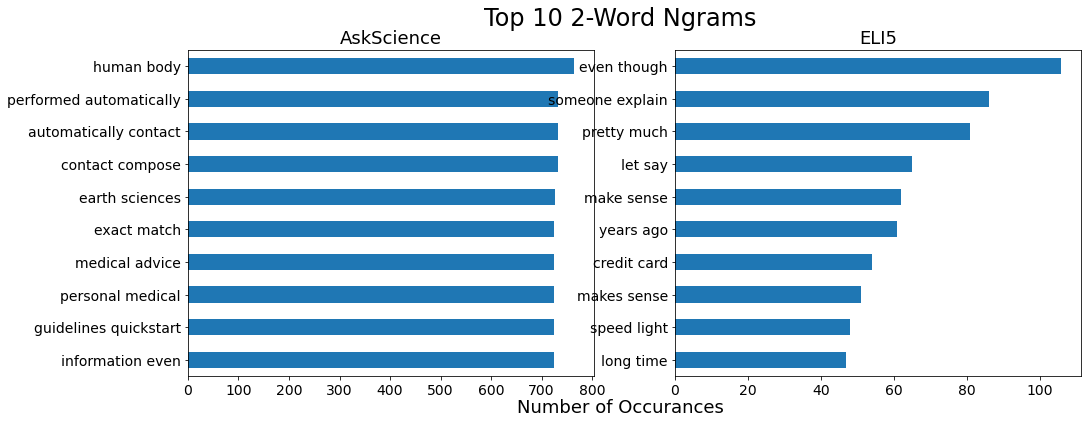

In [103]:
fig2, ax2 = plt.subplots(1,2,figsize=(16,6))
ask_vect_df.sum().sort_values(ascending=False).head(10).plot(kind='barh', ax=ax2[0], fontsize=14)
ex_vect_df.sum().sort_values(ascending=False).head(10).plot(kind='barh', ax=ax2[1], fontsize=14)

ax2[0].set_title('AskScience', fontsize=18)
ax2[1].set_title('ELI5', fontsize=18)
ax2[0].invert_yaxis()
ax2[1].invert_yaxis()

fig2.suptitle('Top 10 2-Word Ngrams', fontsize=24)
fig2.text(0.5,0.04, 'Number of Occurances', ha='center', fontsize=18);

**This seems much more useful than when we only used 1-word ngrams**